In [1]:
import os
import cv2
import glob
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

## Load images

In [ ]:
'''
Normaliza uma imagem
'''
def normalize(gray_image, save_details): 

    __load_models()
    
    face = find_face(gray_image, save_details)
    eyes_pos = find_eyes(face, save_details)

'''
Carregar modelos
'''
def __load_models():
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')

'''
Encontrar a face numa imagem
'''
def find_face(gray_image, save_face=False):

    if(face_cascade is None): 
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=4)

    face = faces[np.argmax([w*h for x, y, w, h in faces])]
    (x_face, y_face, w_face, h_face) = face
    face_region = gray_image[y_face:y_face+h_face, x_face:x_face+w_face]
        
    #if save_face: 
        #cv2.imwrite("TrabalhosPraticos/TP1/images/processed/cropped_faces/" + filename + "_preNomalization." + extention, face_region)

    return face_region
     
'''
Encontrar os olhos numa face previamente detetada
'''
def find_eyes(face_image): 
    if(eye_cascade is None): 
        eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')

    eyes = eye_cascade.detectMultiScale(face_region, scaleFactor=1.1, minNeighbors=4)
    eyes_info = []
    for x, y, w, h in eyes:
        if x is not None: 
            eye_radious = int(round((w + h) * 0.25))
            eye_center = (x_face + x + w//2, y_face+ y + h//2)

            eyes_info.append((x, y, w, h, eye_center, eye_radious))
            #if eye_radious > 100:   
            img = cv2.circle(img, eye_center, eye_radious, (255, 0, 0), 3)


    img = cv2.rectangle(img, (x_face, y_face), (x_face+w_face, y_face+h_face), (0, 255, 0), 3)
    cv2.imwrite("TrabalhosPraticos/TP1/images/processed/" + file, img)

    # Order eyes by y position
    eyes_info = sorted(eyes_info, key=lambda pos: pos[0])
    print("* Sorted Eyes: \n", eyes)
    eyes_angle = degrees(atan2(-(eyes_info[1][1]-eyes_info[0][1]), eyes_info[1][0]-eyes_info[0][0]))
    print("* Eyes angle: ", eyes_angle)
    print("* Eyes info: ", eyes_info[0][4])
    

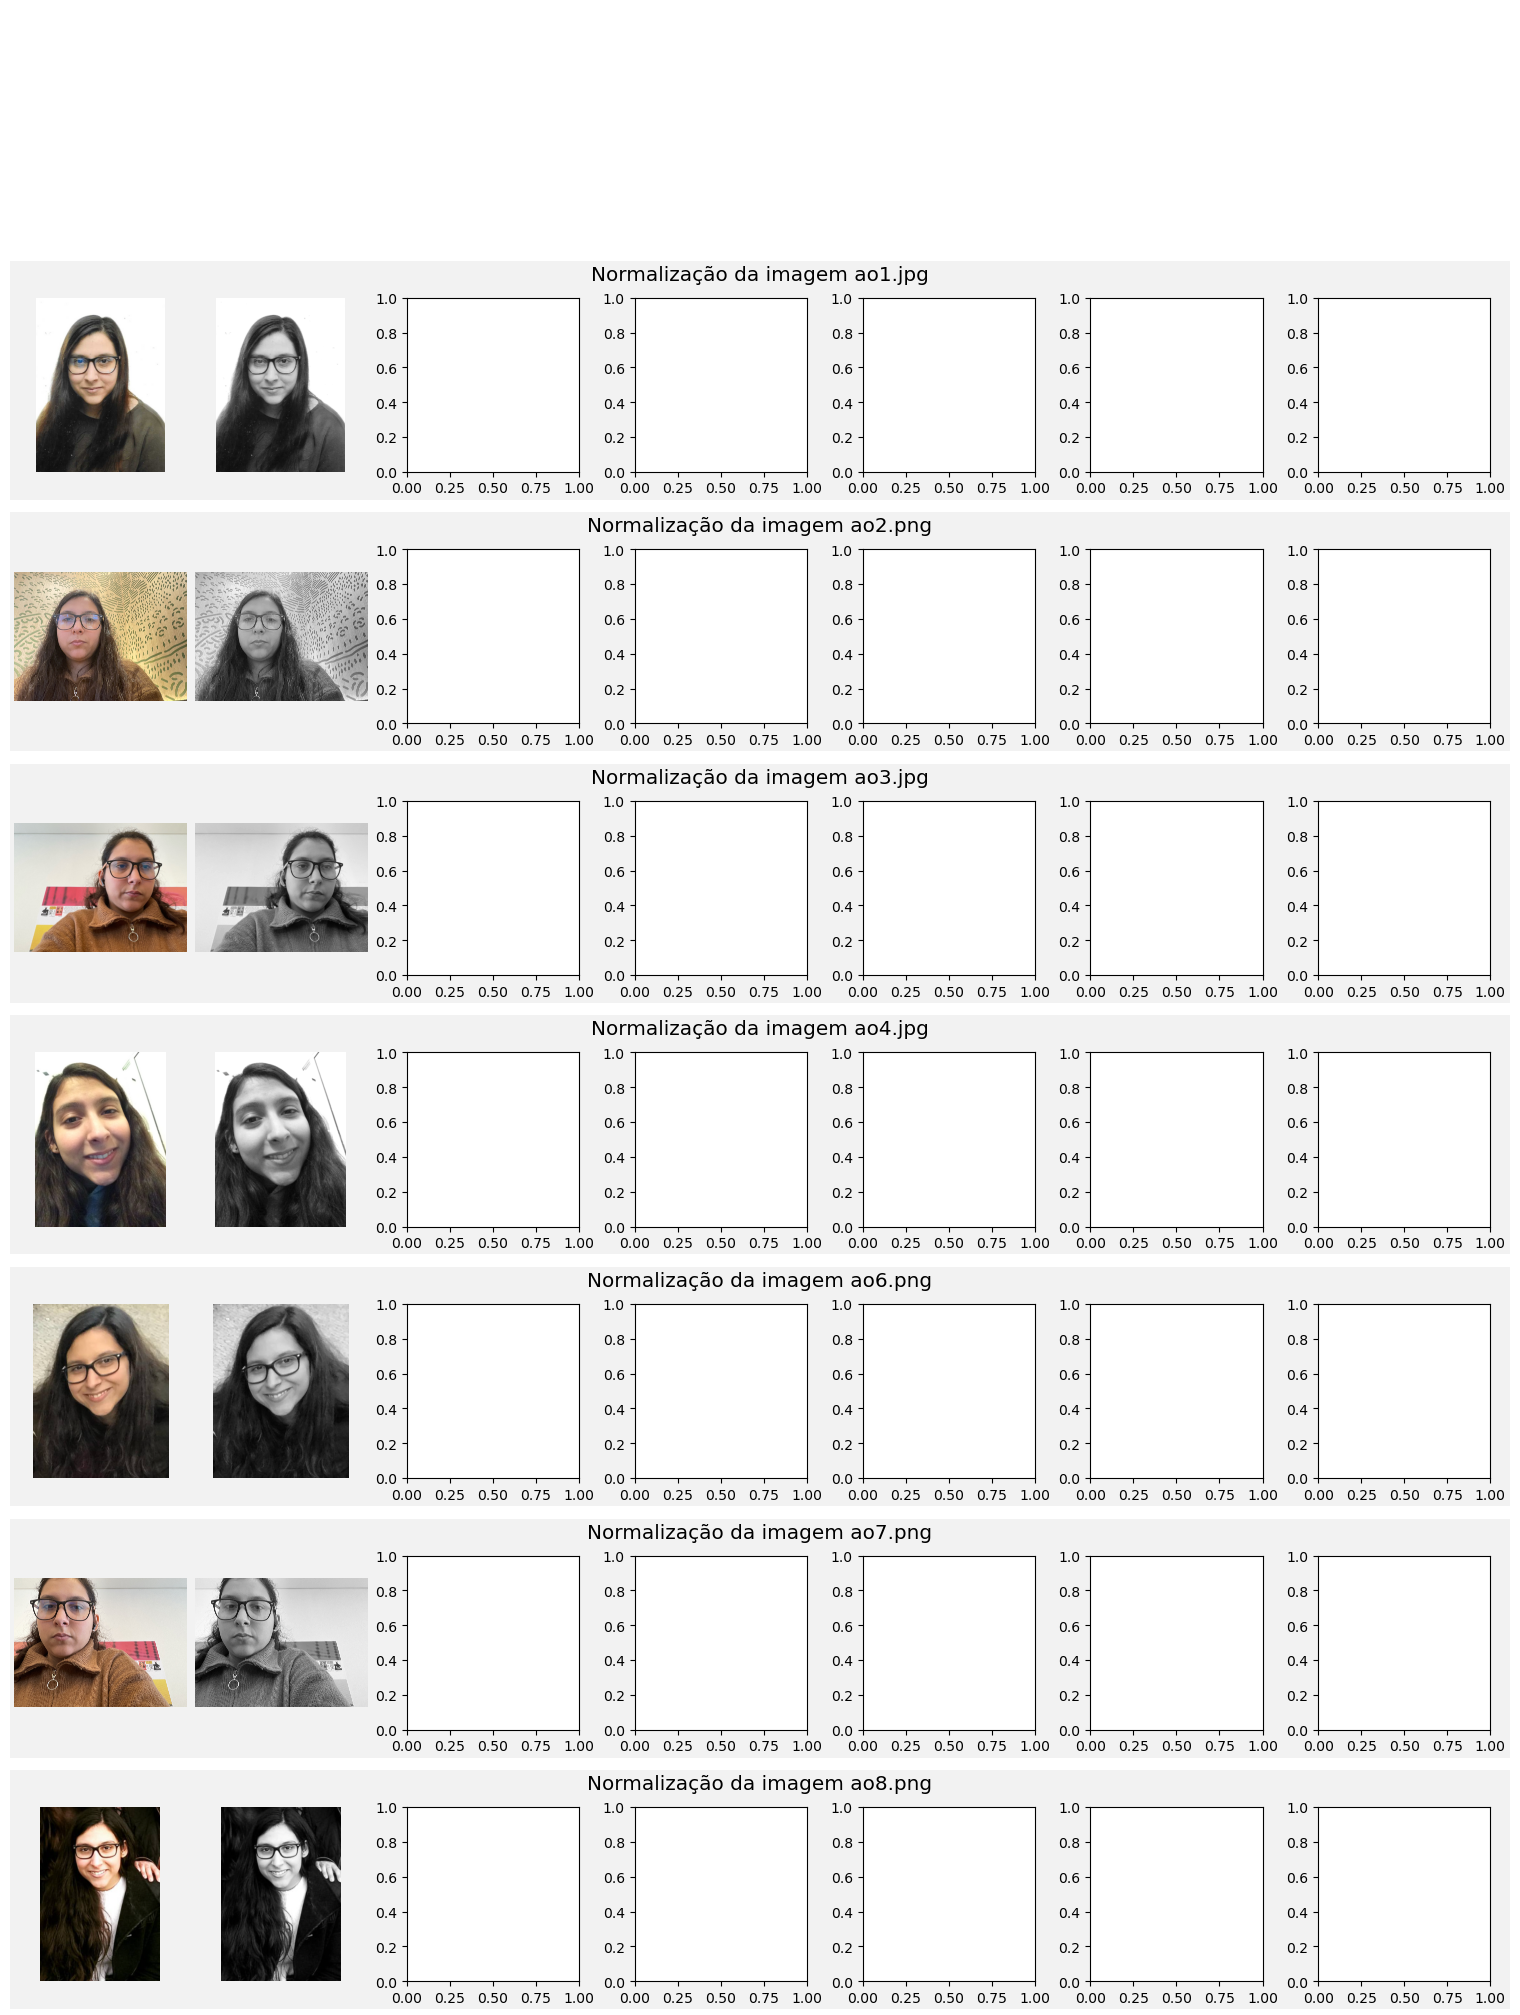

In [60]:
fig = plt.figure(figsize=(15,20), layout='constrained')
subfigs = fig.subfigures(8, 1, hspace=0.05)#, wspace=0.9,  width_ratios=[7])

picNum=0
for file in path.iterdir():
    if(not file.is_dir()):
        #for row, subfig in enumerate(subfigs): 
        #print("Linha: ", picNum)
        subfigs[picNum].set_facecolor('0.95')
        axs = subfigs[picNum].subplots(1,7,sharex=False)
        
        fullFileName = file.name.split("\\")[-1]
        simpleFileName = fullFileName.split(".")[0]
        extension = fullFileName.split(".")[1]
        #print("Filename: ", fullFileName)
        #print("Location: ", file)
    
        subfigs[picNum].suptitle(f'Normalização da imagem {fullFileName}', fontsize='x-large', )
    
        image = cv2.imread(str(file))
        #print("> Shape: ", image.shape, "| Tipo de dados: ", image[0].dtype)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
        #Imagem lida
        axs[0].imshow(image)
        axs[0].axis("off")
        #axs[0,picNum].set_title("{fN} - {fNro}".format(fN=simpleFileName, fNro=picNum))
        #plt.imshow(image)
    
        #Imagem Cinza
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        axs[1].imshow(gray, cmap='gray')
        axs[1].axis("off")
     
        normalized = normalize(gray, save_details=False)
    
        #cv2.imwrite(dirpath + file.split(".")[0] + "Gray." + file.split(".")[1], gray)
    picNum+=1
    #row+=1
    print()
    print()

plt.show();

Filename:  ao1.jpg
Location:  C:\Users\ana.sofia.oliveira\Documents\ISEL\VARM2324\TrabalhosPraticos\TP1\images\originais\ao1.jpg
> Shape:  (1001, 738, 3) | Tipo de dados:  uint8
Filename:  ao2.png
Location:  C:\Users\ana.sofia.oliveira\Documents\ISEL\VARM2324\TrabalhosPraticos\TP1\images\originais\ao2.png
> Shape:  (3024, 4032, 3) | Tipo de dados:  uint8
Filename:  ao3.jpg
Location:  C:\Users\ana.sofia.oliveira\Documents\ISEL\VARM2324\TrabalhosPraticos\TP1\images\originais\ao3.jpg
> Shape:  (1512, 2016, 3) | Tipo de dados:  uint8
Filename:  ao4.jpg
Location:  C:\Users\ana.sofia.oliveira\Documents\ISEL\VARM2324\TrabalhosPraticos\TP1\images\originais\ao4.jpg
> Shape:  (1748, 1310, 3) | Tipo de dados:  uint8
Filename:  ao6.png
Location:  C:\Users\ana.sofia.oliveira\Documents\ISEL\VARM2324\TrabalhosPraticos\TP1\images\originais\ao6.png
> Shape:  (339, 263, 3) | Tipo de dados:  uint8
Filename:  ao7.png
Location:  C:\Users\ana.sofia.oliveira\Documents\ISEL\VARM2324\TrabalhosPraticos\TP1\imag

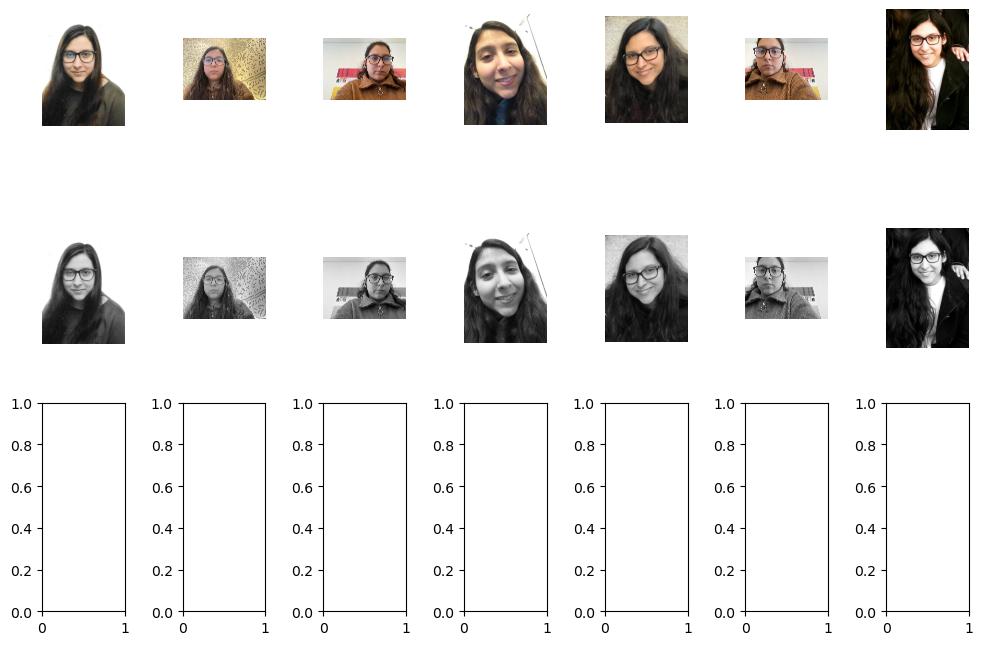

In [2]:
path = Path(".")
path = path.joinpath("../images/originais").resolve()

picNum = 0
fig, axs = plt.subplots(nrows=3, ncols=7, figsize=(10, 7), tight_layout=True)

for file in path.iterdir():
    if(not file.is_dir()):
        fullFileName = file.name.split("\\")[-1]
        simpleFileName = fullFileName.split(".")[0]
        extension = fullFileName.split(".")[1]
        print("Filename: ", fullFileName)
        print("Location: ", file)

        image = cv2.imread(str(file))
        print("> Shape: ", image.shape, "| Tipo de dados: ", image[0].dtype)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axs[0,picNum].imshow(image)
        axs[0,picNum].axis("off")
        #axs[0,picNum].set_title("{fN} - {fNro}".format(fN=simpleFileName, fNro=picNum))
        #plt.imshow(image)

        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        axs[1,picNum].imshow(gray, cmap='gray')
        axs[1,picNum].axis("off")

        #face = find_face(gray)

        #eyes_pos = find_eyes(face)

        #normalized = normalize(gray, eyes_pos)

        '''axs[2,picNum].imshow(normalized)
        axs[2,picNum].axis("off")
        axs[2,picNum].set_title("{fN} Normalizada - {fNro}".format(fN=simpleFileName, fNro=picNum))'''
        
        #cv2.imwrite(dirpath + file.split(".")[0] + "Gray." + file.split(".")[1], gray)
        picNum+=1
print()
plt.show()